# Using QGIS *actions* to interact with Bios*Py*tial

Bios*Py*tial has an HTTP backend that enables the use of HTTP requests and responses. 
Using the QGIS built-in *actions* it is possible to visualize and analize Taxonomies within the QGIS environment.

These *actions* are HTTP requests to the Webserver that runs natively in Bios*Py*tial. The server responses theses requests
in the form of a full Html webpage capable of running other scripts in Javascripts like Jquery, Ajax, 3js, etc.
The webpage is deployed in a QGIS dialog box that serves as a container for the HTML document.

## Example: Visualizing Trees in a *clicked* taxonomy

The available HTTP services in Bios*Py*tial are defined in ´biospatial/urls.py´. These services can be accessed by visiting 
the specified url with the required GET variables (More info in: <https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol#Request_methods> ). 

For the sake of this example we are going to use the service: **getAllTrees** that requires the variables: **gid**, **names** and **g_l** where:

* **gid** is the id number of the chosen cell.
* **name** is a boolean variable {0,1} if 0 the visualization will be the id number, if 1 the visualization will be with the full name of taxa.
* **g_l** is the aggregation level. Always within the scope of the Grids stored in the database and the *scales* variables defined in the mesh.models module).


### Linking the service with an *action* in QGIS

For defining this service as an action in QGIS first:

* Select the desired layer. 
    *(In this example, we are going to use the zoom layer: 8 and the gid is going to be assigned automaticaly when clicked on it)*
    
* Open the *properties* dialog of the selected Layer, select *actions* and add the following python code:

In [ ]:
from PyQt4.QtCore import QUrl; from PyQt4.QtWebKit import QWebView;  myWV = QWebView(None); myWV.load(QUrl('http://127.0.0.1:8000/getAllTrees/?gid=[% "gid" %]&g_l=8&names=1')); myWV.show()

Do note that http://127.0.0.1:8000 is the HOME URL address of the Bios*Py*tial web server. If you have chosen other configurations (e.g. for use in a network) this address should be changed acordingly.

The *action* dialog should look like this:

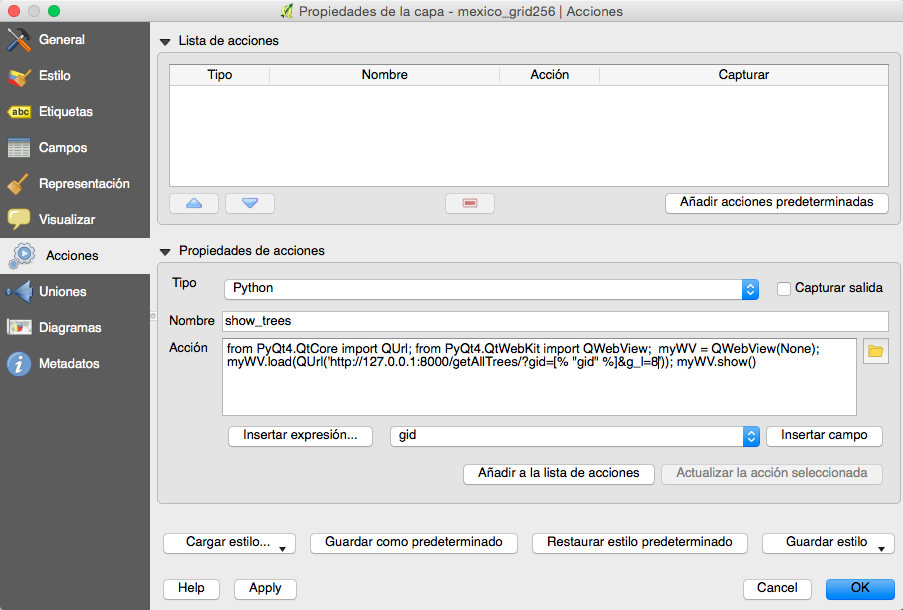

In [2]:
from IPython.display import Image
Image(filename='docs/_static/qgis_action.png')

After adding it to the *list of actions* the service is going to be available in the actions menu, in the QGIS toolbar. 
The figure below shows the result of this particular service (showAllTrees). 

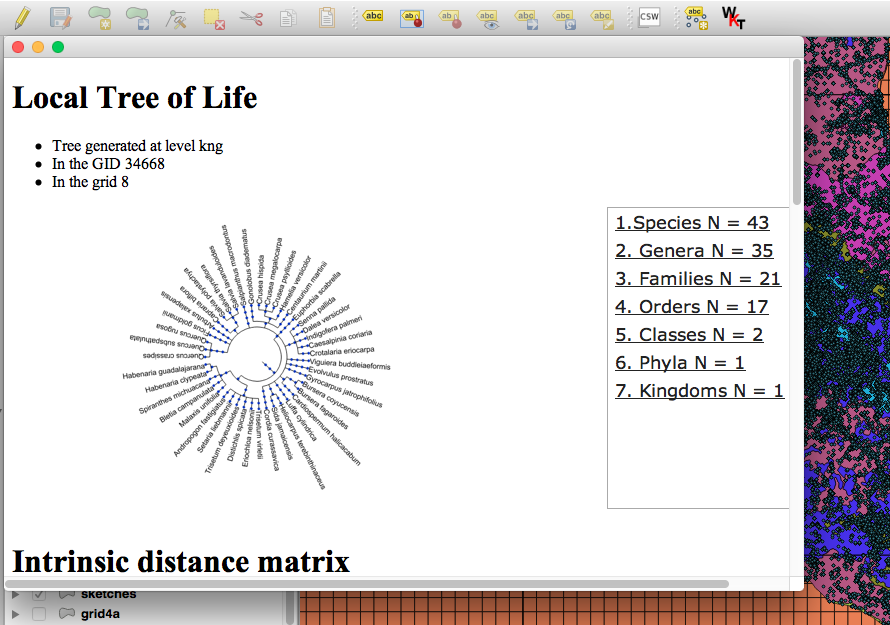

In [4]:
from IPython.display import Image
Image(filename='docs/_static/showalltrees.png')

The content of this dialog is the visual representation of the Taxonomy data structure. Some intrinsic attributes are also shown
like the Intrisic Matrix and the Single Value Decomposition.

### Conclusions

The use of the HTTP protocol as well as the webserver capabilities of Bios*Py*tial 
opens a plethora of services for visualizing, inspect and analyse patterns of data aggregation and taxa distribution accross space.
These methods can be combined with a GIS to improve analysis and design new algorithms or studies using the GBIF data as a first source but overlapping
the effects of other spatial distributed phenomena. 